In [76]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [77]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv("creditcard.csv") 

In [78]:
# first 5 rows of the dataset
credit_card_data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [79]:
credit_card_data.tail(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.353722,0.488487,0.293632,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0
284788,172770.0,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
284790,172771.0,-0.515513,0.971950,-1.014580,-0.677037,0.912430,-0.316187,0.396137,0.532364,-0.224606,...,-0.280302,-0.849919,0.300245,0.000607,-0.376379,0.128660,-0.015205,-0.021486,9.81,0
284791,172774.0,-0.863506,0.874701,0.420358,-0.530365,0.356561,-1.046238,0.757051,0.230473,-0.506856,...,-0.108846,-0.480820,-0.074513,-0.003988,-0.113149,0.280378,-0.077310,0.023079,20.32,0
284792,172774.0,-0.724123,1.485216,-1.132218,-0.607190,0.709499,-0.482638,0.548393,0.343003,-0.226323,...,0.414621,1.307511,-0.059545,0.242669,-0.665424,-0.269869,-0.170579,-0.030692,3.99,0
284793,172775.0,1.971002,-0.699067,-1.697541,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,...,0.188758,0.694418,0.163002,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0


In [80]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [81]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [82]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unbalanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [83]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [84]:

 #legit_sample under-sampling 
legit_sample = legit.sample(n=len(fraud), random_state=2) 
balanced_data = pd.concat([legit_sample, fraud], axis=0)

In [85]:
print(f"\n Legit shape: {legit.shape}")
print(f" Fraud shape: {fraud.shape}")


 Legit shape: (284315, 31)
 Fraud shape: (492, 31)


In [86]:
# statistical measures of the data
print("\nLegit Amount Statistics:")
legit.Amount.describe()


Legit Amount Statistics:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [87]:
print("\nFraud Amount Statistics:")
fraud.Amount.describe()


Fraud Amount Statistics:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [88]:
# compare the values for both transactions
print("\n Mean values by class:")
credit_card_data.groupby('Class').mean()


 Mean values by class:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


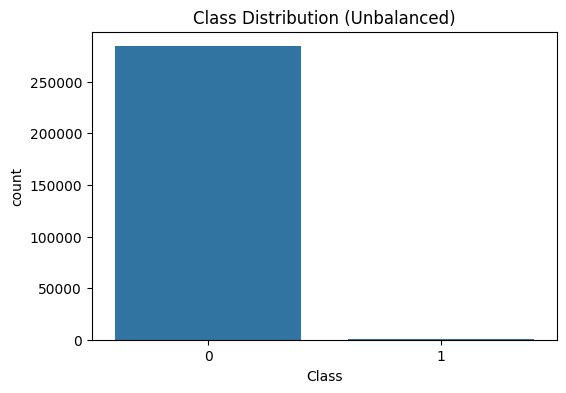

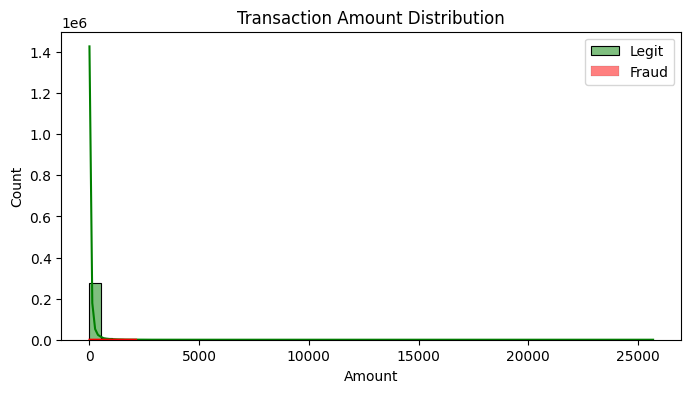

In [89]:
#Data Visualization

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=credit_card_data)
plt.title("Class Distribution (Unbalanced)")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(credit_card_data[credit_card_data['Class'] == 0]['Amount'], bins=50, color='green', label='Legit', kde=True)
sns.histplot(credit_card_data[credit_card_data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Amount Distribution")
plt.show()

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [90]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [91]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [92]:
new_dataset.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188671,128077.0,-3.288944,-4.809848,-1.231524,6.041078,-1.948400,1.772856,2.177367,0.561664,-1.859951,...,1.352295,0.869342,2.760665,-0.514612,0.114622,0.531044,-0.533325,-0.548096,1206.14,0
190546,128878.0,2.020493,-1.000658,-1.039495,-0.453275,-0.737034,-0.433760,-0.587955,-0.148476,-0.491796,...,0.024865,0.619987,-0.041074,-0.264674,-0.025601,0.910031,-0.051887,-0.063195,67.95,0
46318,42728.0,0.883694,-0.761362,0.928801,1.389779,-0.730351,1.228938,-0.771123,0.432439,1.196648,...,-0.036445,-0.104183,-0.321204,-0.812608,0.547630,-0.273658,0.055533,0.039590,150.00,0
267636,162855.0,-0.072377,0.735400,-2.211240,-2.153156,3.556343,2.781633,1.142571,0.602748,-0.561615,...,0.256899,0.796234,-0.159167,0.752505,-0.263957,0.108374,0.406915,0.263924,24.00,0
189610,128481.0,-0.264285,0.990040,-0.643148,-0.984799,0.813840,0.033159,0.536661,0.483326,-0.368426,...,-0.246360,-0.708310,-0.024761,-1.457310,-0.325381,0.213825,0.115022,0.010990,14.28,0
106731,70100.0,-2.875718,1.668996,-0.161327,-0.085390,0.012261,1.729534,-1.029605,2.147039,-0.771380,...,0.037015,-0.053658,-0.274146,-1.719268,0.277659,0.464675,-0.458367,-0.285728,31.95,0
221969,142768.0,2.181569,-0.715224,-1.173908,-0.757233,-0.606652,-1.190928,-0.279472,-0.366259,-0.381839,...,-0.017268,0.022861,0.224125,-0.000216,-0.082395,-0.326527,-0.028035,-0.058861,21.00,0
205386,135724.0,-0.578457,1.196864,0.778916,2.593794,1.328661,-0.147200,1.191628,-0.124365,-1.411312,...,0.291062,0.980673,-0.079288,-0.065883,-0.329134,-0.047066,0.060296,0.211936,9.96,0
115727,73987.0,1.361217,-0.550370,-0.243645,-0.737972,-0.407452,-0.243297,-0.247795,-0.150740,-1.125281,...,-0.423862,-0.676699,-0.156905,-0.426744,0.529000,1.119962,-0.074312,-0.013499,38.00,0
60764,49491.0,0.939091,-0.127803,0.322077,1.289616,0.010824,0.631474,-0.024870,0.257710,0.035307,...,0.020605,0.127743,-0.105881,-0.278216,0.527913,-0.307348,0.038616,0.014585,79.94,0


In [93]:
new_dataset.tail(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261473,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,...,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1
261925,160243.0,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,...,0.203563,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1
262560,160537.0,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,-3.541780,...,0.614221,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,4.69,1
262826,160665.0,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,-4.588536,...,0.622200,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,0.77,1
263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
263274,160870.0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,...,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,1
263324,160895.0,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,-2.548788,...,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,127.14,1
263877,161154.0,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,0.38,1
268375,163181.0,-5.238808,0.623013,-5.784507,1.678889,-0.364432,-0.477295,-4.276132,-0.695173,-2.971644,...,-0.326140,1.509239,-0.215966,-0.245727,0.893041,0.865758,0.854657,-0.964482,39.98,1
272521,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31,1


In [94]:
print("\nBalanced Dataset Class Distribution:")
new_dataset['Class'].value_counts()


Balanced Dataset Class Distribution:


Class
0    492
1    492
Name: count, dtype: int64

In [95]:
print("\n Balanced Dataset Mean:")
new_dataset.groupby('Class').mean()


 Balanced Dataset Mean:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95169.597561,-0.019460,0.014204,-0.073895,0.051097,0.102674,-0.022626,0.014979,-0.012521,-0.014322,...,-0.079576,0.019515,0.038665,-0.004756,0.042502,0.009427,0.014371,-0.003561,-0.021240,75.156280
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [96]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [97]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
188671  128077.0 -3.288944 -4.809848 -1.231524  6.041078 -1.948400  1.772856   
190546  128878.0  2.020493 -1.000658 -1.039495 -0.453275 -0.737034 -0.433760   
46318    42728.0  0.883694 -0.761362  0.928801  1.389779 -0.730351  1.228938   
267636  162855.0 -0.072377  0.735400 -2.211240 -2.153156  3.556343  2.781633   
189610  128481.0 -0.264285  0.990040 -0.643148 -0.984799  0.813840  0.033159   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [98]:
print(Y)

188671    0
190546    0
46318     0
267636    0
189610    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [100]:
print("\nDataset split info:")
print(X.shape, X_train.shape, X_test.shape)


Dataset split info:
(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [101]:
model = LogisticRegression()

In [102]:
# training the Logistic Regression Model with Training Data
model = LogisticRegression(random_state=2)
model.fit(X_train, Y_train)

c:\Users\DELL\Desktop\fraud_detection_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Model Evaluation

Accuracy Score

In [103]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("\nTraining Accuracy:", training_data_accuracy)


Training Accuracy: 0.951715374841169


In [104]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.949238578680203


In [105]:
# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, X_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



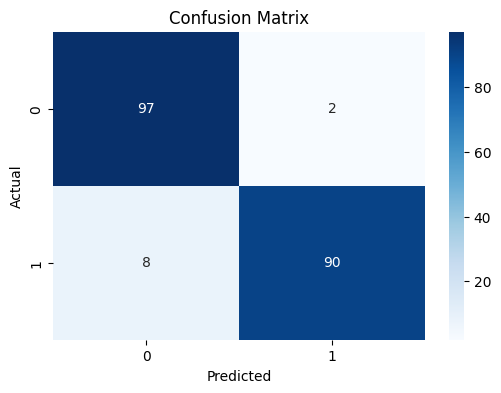

In [106]:
# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [107]:
# ROC Curve
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = roc_auc_score(Y_test, y_probs)

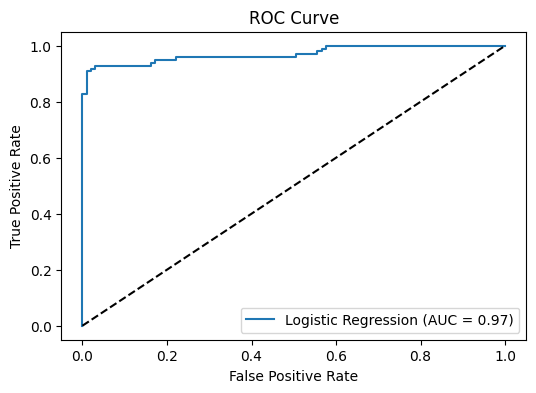

In [108]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [109]:
print("Credit Card Fraud Detection Summary")
print("- Model Used: Logistic Regression")
print("- Accuracy Achieved:", "%.2f%%" % (test_data_accuracy * 100))
print("- Techniques Applied:")
print("  • Under-sampling for dataset balancing")
print("  • Confusion Matrix for error visualization")
print("  • ROC Curve & Precision-Recall Curve for classifier evaluation")
print("  • Classification Report (Precision, Recall, F1-score)")


Credit Card Fraud Detection Summary
- Model Used: Logistic Regression
- Accuracy Achieved: 94.92%
- Techniques Applied:
  • Under-sampling for dataset balancing
  • Confusion Matrix for error visualization
  • ROC Curve & Precision-Recall Curve for classifier evaluation
  • Classification Report (Precision, Recall, F1-score)


In [110]:
with open("model.pkl", "wb") as file:
 pickle.dump(model, file)

In [111]:
print(model)

LogisticRegression(random_state=2)


In [112]:
np.random.seed(2)
